In [ ]:
# default_exp datasets

# Datasets

> Auxilary module for downloading datasets

In [ ]:
#hide
from nbdev.showdoc import *

Here are routines for downloading the datasets. We will be using Oxford5k and Aachen Day-Night datasets

In [ ]:
#export 
from local_feature_tutorial.io import *
import tarfile
def download_oxford5k(save_to_dir):
    url = 'http://www.robots.ox.ac.uk/~vgg/data/oxbuildings/oxbuild_images.tgz'
    md5sum ='c5af8e1457ddfd5d7a8d66fec5293417'
    fname = 'oxbuild_images.tgz'
    saved_fname = download_file(url, fname, md5sum, True)
    tar = tarfile.open(saved_fname, "r:gz")
    tar.extractall(save_to_dir)
    tar.close()
    return

In [ ]:
download_oxford5k('data/oxford5k')

/home/old-ufo/.wbs-tutorial/oxbuild_images.tgz already downloaded


In [ ]:
#export 
import zipfile
def download_aachen_daynight(save_to_dir):
    url = 'https://data.ciirc.cvut.cz/public/projects/2020VisualLocalization/Aachen-Day-Night/aachen_v1_1.zip'
    md5sum ='498be8ccf98644f2dbd3705b0dfadc4c'
    fname = 'aachen_v1_1.zip'
    saved_fname = download_file(url, fname, md5sum, True)
    with zipfile.ZipFile(saved_fname, 'r') as zip_ref:
        zip_ref.extractall(save_to_dir)
    return

In [ ]:
#export
def get_all_images_in_subdirs(dirname):
    import os
    from PIL import Image
    fnames = []
    for path, subdirs, files in os.walk(dirname):
        for fname in files:
            fullpath = os.path.join(path,fname)
            try:
                im = Image.open(fullpath)
                fnames.append(fullpath)
            except:
                pass
    return sorted(fnames)  
def get_aachen_db_images(path_to_aachen_root):
    import os
    return get_all_images_in_subdirs(os.path.join(path_to_aachen_root, 'images_upright/sequences'))
def get_aachen_query_images(path_to_aachen_root):
    import os
    return get_all_images_in_subdirs(os.path.join(path_to_aachen_root, 'images_upright/query'))

In [ ]:
#download_aachen_daynight('data/aachen_v1_1')

In [ ]:
#aachen_queries = get_aachen_query_images('data/aachen_v1_1')
#print (aachen_queries[:5])

['../data/aachen_v1_1/images_upright/query/night/nexus5x_additional_night/IMG_20170702_003136.jpg', '../data/aachen_v1_1/images_upright/query/night/nexus5x_additional_night/IMG_20170702_003150.jpg', '../data/aachen_v1_1/images_upright/query/night/nexus5x_additional_night/IMG_20170702_003203.jpg', '../data/aachen_v1_1/images_upright/query/night/nexus5x_additional_night/IMG_20170702_003208.jpg', '../data/aachen_v1_1/images_upright/query/night/nexus5x_additional_night/IMG_20170702_003213.jpg']


In [ ]:
oxfordimages = get_all_images_in_subdirs('data/oxford5k')

In [ ]:
#export
import cv2
import torch
import os
class RetrievalDataset(torch.utils.data.Dataset):
    """Retrieval dataset."""

    def __init__(self, imglist, root_dir, transform=None):
        """
        Args:
            imglist (list): List of image paths
            root_dir (string): Path to the root directory if imglist is relative.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.imglist = imglist
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.imglist)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_name = os.path.join(self.root_dir,
                                self.imglist[idx])
        image = cv2.cvtColor(cv2.imread(img_name), cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image

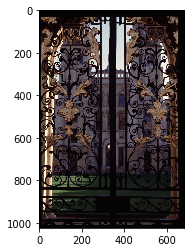

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
oxford_root_dir = 'data/oxford5k'
oxford5k = RetrievalDataset(get_all_images_in_subdirs(oxford_root_dir), '')

for img in oxford5k:
    plt.imshow(img)
    break

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted datasets.ipynb.
Converted index.ipynb.
Converted io.ipynb.
Converted retrieval.ipynb.
Converted visualization.ipynb.
Converted wbs.ipynb.
